In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
raw_dataset = pd.read_csv('Downloads/Iris.csv')

In [6]:
raw_dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
dataset = raw_dataset.copy()

In [14]:
from sklearn import preprocessing as pr
le = pr.LabelEncoder()
dataset['Species'] = le.fit_transform(dataset['Species'])
dataset['Species'].unique()

array([0, 1, 2])

In [16]:
x = dataset.drop(['Species','Id'], axis=1)
print(x)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [18]:
y = dataset['Species']
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [36]:
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [1,2,3,4,5],
    'min_weight_fraction_leaf' : [0.0, 0.1, 0.2],
    'max_features' : ['sqrt', 'log2'],
    'min_impurity_decrease': [0.02,0.04,0.06,0.08,0.1],
    'ccp_alpha' : [0.0, 0.01, 0.1, 0.5, 1]
}

In [38]:
from sklearn.model_selection import GridSearchCV as gcv

In [40]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_cv = gcv(model,param_grid = parameters,cv = 5,scoring = 'accuracy')
model_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1, 0.5, 1],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_impurity_decrease': [0.02, 0.04, 0.06, 0.08, 0.1],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [52]:
model_cv.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_impurity_decrease': 0.06,
 'min_weight_fraction_leaf': 0.2,
 'splitter': 'best'}

In [54]:
best_tree = model_cv.best_estimator_

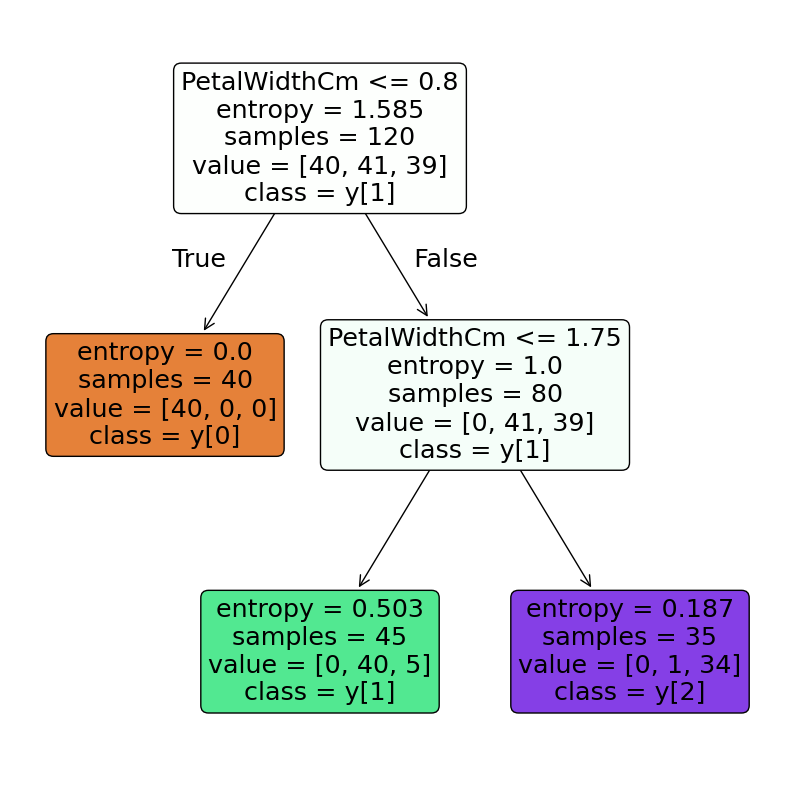

In [56]:
from sklearn.tree import plot_tree
plt.figure(figsize = (10,10))
plot_tree(best_tree, filled=True, feature_names=x.columns, class_names=True, rounded=True)
plt.show()

In [60]:
y_predicted = best_tree.predict(x_test)

In [78]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_predicted,y_test)
print(f"Model accuracy is: {accuracy * 100:.2f}%")

Model accuracy is: 100.00%


In [80]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_predicted, target_names=le.classes_))


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

